News Classifiaction



**Hugging face model:** https://huggingface.co/Oneli/News_Classification


**WebApp:** https://huggingface.co/spaces/Oneli/News_Classification 








In [7]:
pip install transformers datasets torch pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from datasets import Dataset
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize


In [3]:
# Ensure necessary NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# **Section 01**
## **Task 1: Preparing Data**

In [4]:
# Define dataset file paths
dataset_files = {
    "Business": "Business.xlsx",
    "Opinion": "Opinion.xlsx",
    "Political_gossip": "Political_gossip.xlsx",
    "Sports": "Sports.xlsx",
    "World_news": "World_news.xlsx"
}

# Load and preprocess the datasets
def load_and_preprocess_data(files):
    dataframes = []
    for category, file in files.items():
        df = pd.read_excel(file)
        df["class"] = category  # Add class based on filename
        df.drop(columns=["title"], inplace=True)  # Drop title column
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df.drop_duplicates(inplace=True)  # Remove duplicate records
    combined_df.dropna(inplace=True)  # Drop null records
    combined_df.to_excel("Daily_Mirror_News.xlsx", index=False)
    return combined_df

df = load_and_preprocess_data(dataset_files)

The dictionary maps each category to its file path and loop through them to perform the tasks and add each processed file to the dataframe.the tasks are removing any duplicates and
dropna(inplace=True) removes any rows with null/missing values and
 saves the final combined DataFrame to a new Excel file named "Daily_Mirror_News.xlsx".

## **Task 2: EDA & Text Preprocessing**

In [5]:
# Define text preprocessing functions
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_common_and_rare_words(text, word_count, n_common=30, n_rare=100):
    common_words = {word for word, count in word_count.most_common(n_common)}
    rare_words = {word for word, count in word_count.most_common()[:-n_rare-1:-1]}
    return " ".join([word for word in text.split() if word not in common_words and word not in rare_words])

def tokenize_text(text):
    return nltk.word_tokenize(text)


def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    wordnet_map = {"N": wordnet.NOUN, 'V': wordnet.VERB, 'J': wordnet.ADJ, 'R': wordnet.ADV}
    return [lemmatizer.lemmatize(token, wordnet_map.get(nltk.pos_tag([token])[0][1][0].upper(), wordnet.NOUN)) for token in tokens]


In [6]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [7]:
# Load the data to display sample records after implementing preprocessing steps
df = pd.read_excel("Daily_Mirror_News.xlsx")

# Select a sample record from each category to demonstrate preprocessing
sample_records = {}
for category in df['class'].unique():
    sample_records[category] = df[df['class'] == category].iloc[0].copy()

# Create a DataFrame with sample records
sample_df = pd.DataFrame(sample_records).T

# Create copies for each step of preprocessing
original_df = sample_df.copy()
step1_df = sample_df.copy()
step2_df = sample_df.copy()
step3_df = sample_df.copy()
step4_df = sample_df.copy()
step5_df = sample_df.copy()
step6_df = sample_df.copy()

# Apply preprocessing steps one by one to show the changes
print("Original Sample:")
print(original_df['content'])

# Step 1: Convert to string and remove punctuation
step1_df['cleaned_content'] = step1_df['content'].astype(str).apply(remove_punctuation)
print("\nAfter removing punctuation:")
print(step1_df['cleaned_content'])

# Step 2: Remove special characters
step2_df['cleaned_content'] = step1_df['cleaned_content'].apply(remove_special_characters)
print("\nAfter removing special characters:")
print(step2_df['cleaned_content'])

# Step 3: Remove stopwords
step3_df['cleaned_content'] = step2_df['cleaned_content'].apply(remove_stopwords)
print("\nAfter removing stopwords:")
print(step3_df['cleaned_content'])

# Calculate word count on the entire dataset for common/rare word removal
df["content"] = df["content"].astype(str)
df["cleaned_content"] = df["content"].apply(remove_punctuation).apply(remove_special_characters).apply(remove_stopwords)
word_count = Counter(" ".join(df["cleaned_content"].values).split())

# Step 4: Remove common and rare words
step4_df['cleaned_content'] = step3_df['cleaned_content'].apply(lambda x: remove_common_and_rare_words(x, word_count))
print("\nAfter removing common and rare words:")
print(step4_df['cleaned_content'])

# Step 5: Tokenize text
step5_df['tokenized_text'] = step4_df['cleaned_content'].apply(tokenize_text)
print("\nAfter tokenization:")
print(step5_df['tokenized_text'])

# Step 6: Lemmatize tokens
step6_df['lemmatized_text'] = step5_df['tokenized_text'].apply(lemmatize_tokens)
print("\nAfter lemmatization:")
print(step6_df['lemmatized_text'])

# Create a summary DataFrame to show all transformations
summary_df = pd.DataFrame({
    'Original': original_df['content'],
    'No Punctuation': step1_df['cleaned_content'],
    'No Special Chars': step2_df['cleaned_content'],
    'No Stopwords': step3_df['cleaned_content'],
    'No Common/Rare': step4_df['cleaned_content'],
    'Tokenized': step5_df['tokenized_text'].apply(lambda x: str(x)[:100] + '...'),
    'Lemmatized': step6_df['lemmatized_text'].apply(lambda x: str(x)[:100] + '...')
})


Original Sample:
Business            Sri Lanka’s inflation is expected to increase ...
Opinion             Truth, the idiom goes is often stranger than f...
Political_gossip    Three to four Diyawanna members of a main poli...
Sports              Former Sylvester’s, Kandy Sports Club and one ...
World_news          India and the US are set to begin talks to sig...
Name: content, dtype: object

After removing punctuation:
Business            Sri Lanka’s inflation is expected to increase ...
Opinion             Truth the idiom goes is often stranger than fi...
Political_gossip    Three to four Diyawanna members of a main poli...
Sports              Former Sylvester’s Kandy Sports Club and one o...
World_news          India and the US are set to begin talks to sig...
Name: cleaned_content, dtype: object

After removing special characters:
Business            Sri Lankas inflation is expected to increase s...
Opinion             Truth the idiom goes is often stranger than fi...
Political_go

In [8]:
# Apply text preprocessing
df["content"] = df["content"].astype(str)
df["cleaned_content"] = df["content"].apply(remove_punctuation)
df["cleaned_content"] = df["cleaned_content"].apply(remove_special_characters)
df["cleaned_content"] = df["cleaned_content"].apply(remove_stopwords)

word_count = Counter(" ".join(df["cleaned_content"].values).split())
df["cleaned_content"] = df["cleaned_content"].apply(lambda x: remove_common_and_rare_words(x, word_count))

df["tokenized_text"] = df["cleaned_content"].apply(tokenize_text)

df["lemmatized_text"] = df["tokenized_text"].apply(lemmatize_tokens)

df.to_excel("Preprocessed_Daily_Mirror_News.xlsx", index=False)


*   As this is a news classification task ensuring that all are in str format is vital as a preprocessing step.
*   Punctuation marks generally don't carry significant meaning for news category classification.Removing punctuation reduces noise and dimensionality in the feature space.
Special characters, digits, and symbols (like currency symbols, percentages, etc.) can introduce noise in the classification process.

*  Stopwords like "the," "is," "at," etc., appear frequently in all categories of news and don't contribute meaningful information for distinguishing between them. Removing stopwords reduces dimensionality significantly  andwhen it comes to news classification differences are in subjectmatter content not in stopwords


* Removing the 30 most common words helps eliminate the category-neutral terms like "said","according"
 Words that appear very infrequently (in only 1-2 documents) are often proper nouns, misspellings, or highly specific terms that won't generalize well. Removing the 100 rarest words prevents overfitting to these unusual terms.  
*  Tokenization breaks text into individual units (words), which is necessary for further processing and for the model to work  





* Lemmatization reduces words to their base form while considering part of speech, which is more sophisticated than simple stemming.It maintains readability of the terms (unlike stemming) It properly handles irregular verbs and nouns common in news writing.It preserves the semantic meaning better than stemming   






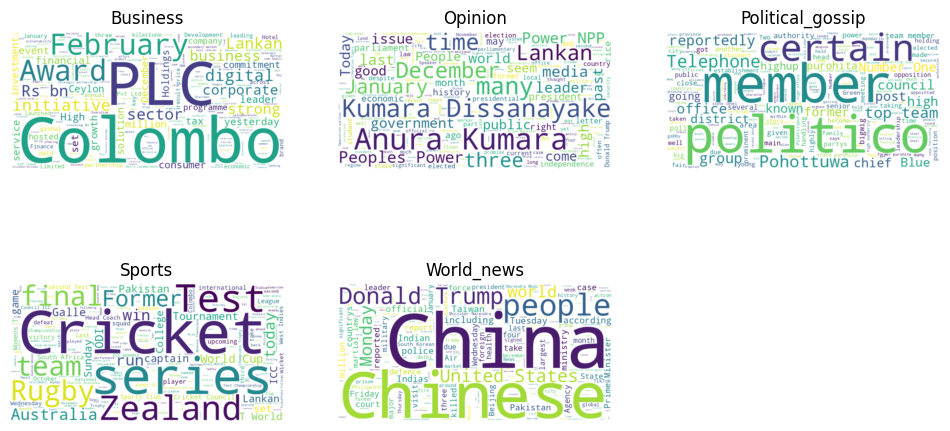

In [9]:
# Generate word clouds after preprocessing
def generate_word_clouds(data):
    plt.figure(figsize=(12, 6))
    for i, category in enumerate(data["class"].unique()):
        text = " ".join(data[data["class"] == category]["cleaned_content"].dropna().astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
        plt.subplot(2, 3, i + 1)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(category)
    plt.show()

generate_word_clouds(df)

<ipython-input-11-770ad570d603>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams), palette="viridis")


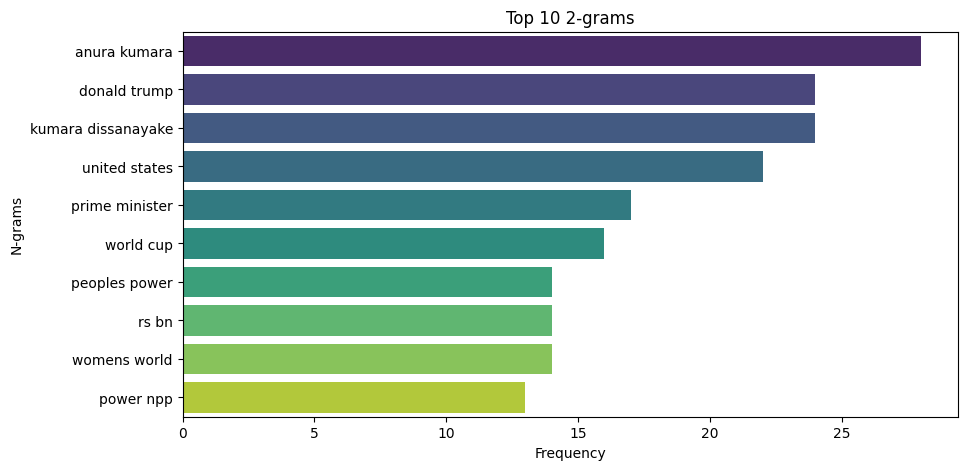

<ipython-input-11-770ad570d603>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams), palette="viridis")


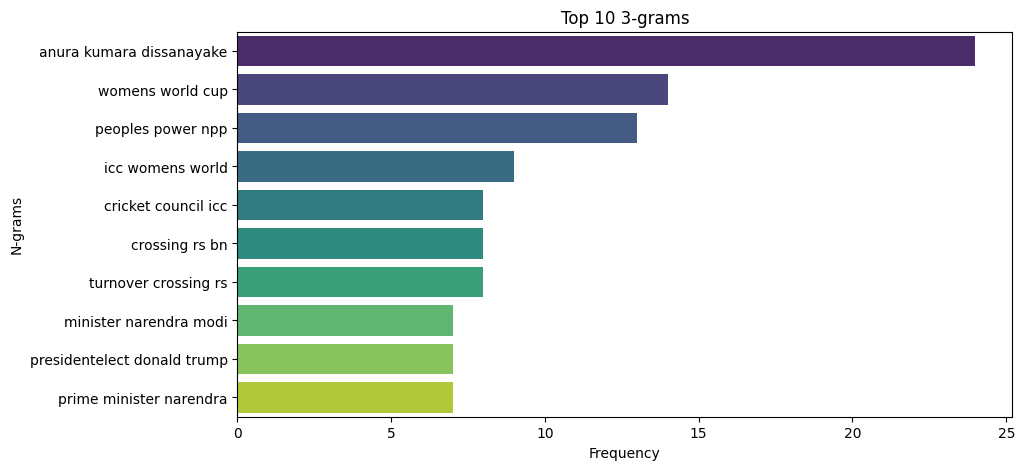

In [11]:
# Generate n-grams (bigrams and trigrams)
def plot_ngrams(text_series, n=2, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_matrix = vectorizer.fit_transform(text_series)
    ngram_counts = ngram_matrix.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    ngram_freq = Counter(dict(zip(ngram_vocab, ngram_counts)))

    most_common_ngrams = ngram_freq.most_common(top_n)
    ngrams, counts = zip(*most_common_ngrams)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(ngrams), palette="viridis")
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.title(f"Top {top_n} {n}-grams")
    plt.show()

plot_ngrams(df["cleaned_content"], n=2, top_n=10)  # Bigrams
plot_ngrams(df["cleaned_content"], n=3, top_n=10)  # Trigrams

<ipython-input-10-8fb2f4322d6c>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='term', data=top_terms, palette='viridis')
<ipython-input-10-8fb2f4322d6c>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='term', data=top_terms, palette='viridis')
<ipython-input-10-8fb2f4322d6c>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='term', data=top_terms, palette='viridis')
<ipython-input-10-8fb2f4322d6c>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

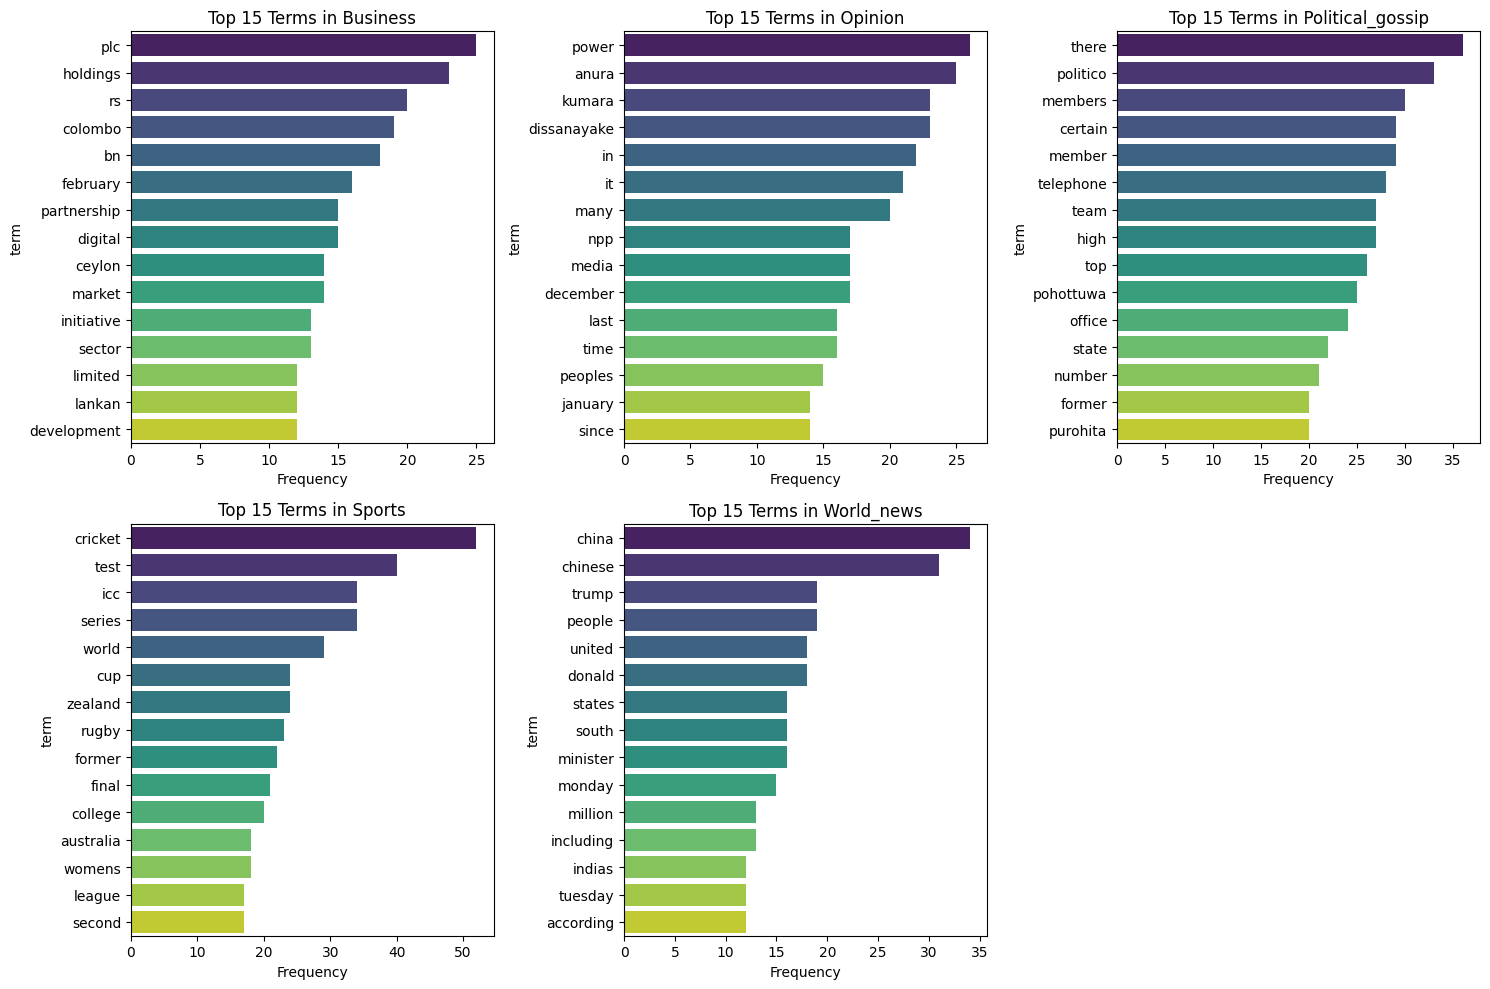

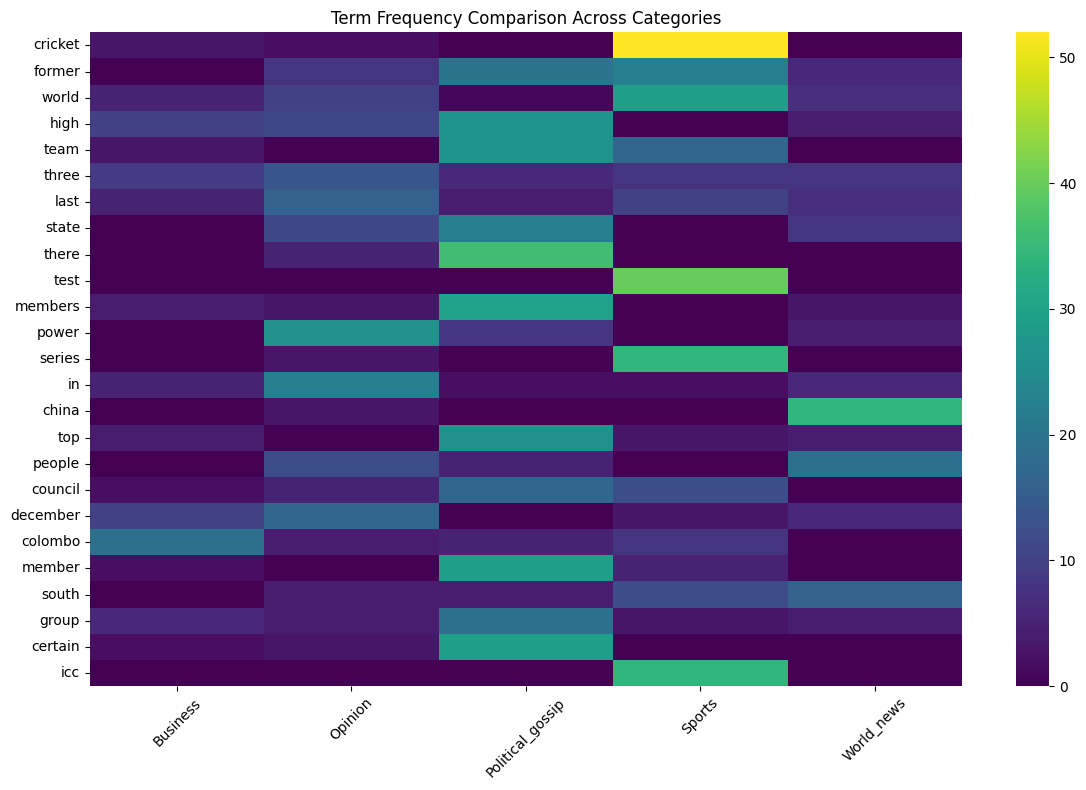

In [10]:
# Term Frequency Analysis
def plot_term_frequency(df, column='cleaned_content', n_terms=15):
    # Create CountVectorizer
    vectorizer = CountVectorizer(max_features=500)

    # Create figure for subplots
    plt.figure(figsize=(15, 10))

    # For each category, find and plot the most frequent terms
    for i, category in enumerate(df['class'].unique()):
        # Get text for this category
        category_text = df[df['class'] == category][column].astype(str)

        # Vectorize the text
        X = vectorizer.fit_transform(category_text)

        # Get feature names
        terms = vectorizer.get_feature_names_out()

        # Calculate term frequencies
        term_freq = X.sum(axis=0).A1

        # Create a DataFrame with terms and their frequencies
        term_freq_df = pd.DataFrame({'term': terms, 'frequency': term_freq})

        # Sort by frequency in descending order
        term_freq_df = term_freq_df.sort_values('frequency', ascending=False)

        # Take top n terms
        top_terms = term_freq_df.head(n_terms)

        # Create subplot
        plt.subplot(2, 3, i + 1)
        sns.barplot(x='frequency', y='term', data=top_terms, palette='viridis')
        plt.title(f'Top {n_terms} Terms in {category}')
        plt.xlabel('Frequency')
        plt.tight_layout()

    plt.show()

    # Create a heatmap for term frequency comparison across categories
    plt.figure(figsize=(12, 8))

    # Create a matrix to hold term frequencies by category
    category_term_matrix = {}

    # For each category, calculate term frequencies
    for category in df['class'].unique():
        category_text = df[df['class'] == category][column].astype(str)
        X = vectorizer.fit_transform(category_text)
        terms = vectorizer.get_feature_names_out()
        term_freq = X.sum(axis=0).A1
        category_term_matrix[category] = dict(zip(terms, term_freq))

    # Get common terms across all categories
    all_terms = set()
    for terms_dict in category_term_matrix.values():
        all_terms.update(terms_dict.keys())

    # Create DataFrame with term frequencies for each category
    heatmap_data = pd.DataFrame(index=list(all_terms))

    for category, terms_dict in category_term_matrix.items():
        heatmap_data[category] = heatmap_data.index.map(lambda term: terms_dict.get(term, 0))

    # Sort by total frequency
    heatmap_data['total'] = heatmap_data.sum(axis=1)
    heatmap_data = heatmap_data.sort_values('total', ascending=False).drop('total', axis=1)

    # Take top 25 terms
    top_terms_heatmap = heatmap_data.head(25)

    # Create the heatmap
    sns.heatmap(top_terms_heatmap, cmap='viridis', annot=False)
    plt.title('Term Frequency Comparison Across Categories')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run term frequency analysis
plot_term_frequency(df)

In [14]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.1 MB/s eta 0:00:00


### **Task 3: Select a Hugging Face Model and Task 4: Finetune a Pre-trained Hugging Face Model**

**Base Model: distilbert-base-uncased**

We selected Distilbert-Base-Uncased for news classification due to its efficiency and accuracy, retaining 97% of BERT’s performance while being 60% faster. Its bidirectional transformer architecture captures contextual meaning effectively. The model is lightweight, making it ideal for deployment on Hugging Face Spaces. Fine-tuning includes stratified data splitting, learning rate warm-up, L2 regularization, and early stopping to enhance performance and prevent overfitting and ensuring the best-performing model is saved, balancing speed, accuracy, and generalizability.

**Fine-Tuning:**
Firstly, by stratifying the split based on lables we ensured that the distribution of news categories remain consistant in training and validation datasets.

Warm-up steps are included and then it gradullly increases to the desired level to make the model more optimal for the task and also it allows the model to gradually adapt for the news classification task.

Adding L2 regularization helps prevent overfitting by penalizing large weights, making the model more generalizable to unseen news articles.

Early stopping callback prevents overfitting by monitoring validation loss and stopping training when performance begins to degrade, saving both time and preserving model generalization.

"load_best_model_at_end=True,
metric_for_best_model='eval_loss'"- This ensures you save the version of the model that performs best on the validation set rather than simply the last iteration.

In [24]:
import numpy as np
import pandas as pd
import torch
from datasets import Dataset
from sklearn.model_selection import train_test_split
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
import evaluate
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

def prepare_data(df, tokenizer, max_length=512):
    """
    Comprehensive data preparation with advanced tokenization

    Args:
        df (pandas.DataFrame): Input DataFrame
        tokenizer (AutoTokenizer): Tokenizer for encoding
        max_length (int): Maximum sequence length

    Returns:
        tuple: (train_dataset, val_dataset, label_mapping)
    """
    # Create label mapping
    original_classes = df["class"].unique()
    label_mapping = {label: i for i, label in enumerate(original_classes)}

    # Prepare data
    df = df.copy()
    df["labels"] = df["class"].map(label_mapping).astype(int)

    # Split dataset
    X_train, X_val, y_train, y_val = train_test_split(
        df["cleaned_content"], df["labels"],
        test_size=0.2,
        stratify=df["labels"],
        random_state=42
    )

    # Tokenization function with more detailed preprocessing
    def tokenize_function(texts, labels):
        encodings = tokenizer(
            texts.tolist(),
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask'],
            'labels': torch.tensor(labels.tolist())
        }

    # Create datasets
    train_encodings = tokenize_function(X_train, y_train)
    val_encodings = tokenize_function(X_val, y_val)

    # Custom PyTorch Dataset
    class NewsClassificationDataset(torch.utils.data.Dataset):
        def __init__(self, encodings):
            self.encodings = encodings

        def __getitem__(self, idx):
            item = {
                'input_ids': self.encodings['input_ids'][idx],
                'attention_mask': self.encodings['attention_mask'][idx],
                'labels': self.encodings['labels'][idx]
            }
            return item

        def __len__(self):
            return len(self.encodings['input_ids'])

    train_dataset = NewsClassificationDataset(train_encodings)
    val_dataset = NewsClassificationDataset(val_encodings)

    return train_dataset, val_dataset, label_mapping

def create_model(num_labels):
    """
    Create and prepare model with custom configuration

    Args:
        num_labels (int): Number of classification labels

    Returns:
        AutoModelForSequenceClassification: Configured model
    """
    # Use pre-trained DistilBERT
    model = AutoModelForSequenceClassification.from_pretrained(
        'distilbert-base-uncased',
        num_labels=num_labels,
        # Additional configurations
        output_attentions=False,
        output_hidden_states=False
    )

    return model

def train_model(model, train_dataset, val_dataset, label_mapping):
    """
    Advanced training with learning rate scheduling and custom optimization

    Args:
        model (AutoModelForSequenceClassification): Model to train
        train_dataset (Dataset): Training dataset
        val_dataset (Dataset): Validation dataset
        label_mapping (dict): Mapping of labels

    Returns:
        Trained model
    """
    # Prepare training arguments with more detailed configuration
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=10,  # Increased epochs
        per_device_train_batch_size=16,  # Adjusted batch size
        per_device_eval_batch_size=64,
        warmup_steps=500,  # Learning rate warmup
        weight_decay=0.01,  # L2 regularization
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model='eval_loss',
    )

    # Prepare metrics
    metrics = {
        'accuracy': evaluate.load('accuracy'),
        'f1': evaluate.load('f1')
    }

    # Metrics computation function
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)

        return {
            'accuracy': metrics['accuracy'].compute(predictions=predictions, references=labels)['accuracy'],
            'f1': metrics['f1'].compute(predictions=predictions, references=labels, average='macro')['f1']
        }

    # Trainer with early stopping
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
    )

    # Train the model
    trainer.train()

    return trainer

def main():
    # Load preprocessed data
    df = pd.read_excel("Preprocessed_Daily_Mirror_News.xlsx")

    # Tokenizer
    tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

    # Prepare datasets
    train_dataset, val_dataset, label_mapping = prepare_data(df, tokenizer)

    # Create model
    model = create_model(num_labels=len(label_mapping))

    # Train model
    trained_model = train_model(model, train_dataset, val_dataset, label_mapping)

    # Save model and tokenizer
    trained_model.save_model('./fine_tuned_news_classification')
    tokenizer.save_pretrained('./fine_tuned_news_classification_tokenizer')

    # Save label mapping
    import json
    with open('./label_mapping.json', 'w') as f:
        json.dump(label_mapping, f)

    print("Model training completed.")
    print("Label Mapping:", label_mapping)

def load_model():
    """
    Load the fine-tuned model
    """
    # Load label mapping
    with open('./label_mapping.json', 'r') as f:
        label_mapping = json.load(f)

    # Load model and tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(
        './fine_tuned_news_classification',
        num_labels=len(label_mapping)
    )
    tokenizer = AutoTokenizer.from_pretrained('./fine_tuned_news_classification_tokenizer')

    return model, tokenizer, label_mapping

if __name__ == "__main__":
    main()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.588400,1.570853,0.455882,0.395824
2,1.263500,1.180575,0.720588,0.665700
3,0.738700,0.658033,0.794118,0.767541
4,0.333500,0.450438,0.852941,0.852350
5,0.133900,0.359958,0.877451,0.880127
6,0.060600,0.566995,0.848039,0.851122
7,0.027600,0.524386,0.882353,0.885876
8,0.004600,0.495762,0.887255,0.887627


Model training completed.
Label Mapping: {'Business': 0, 'Opinion': 1, 'Political_gossip': 2, 'Sports': 3, 'World_news': 4}


In [16]:
!pip install huggingface_hub

In [31]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import os
import json

# Path to your fine-tuned model
model_path = './fine_tuned_news_classification'
tokenizer_path = './fine_tuned_news_classification_tokenizer'

# Load label mapping
with open('./label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

# Load the model
model = AutoModelForSequenceClassification.from_pretrained(
    model_path,
    num_labels=len(label_mapping)
)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    tokenizer_path,
    use_fast=True
)

# Create save directory
save_path = "./News_Classification"
os.makedirs(save_path, exist_ok=True)

# Save model and tokenizer
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print(f"Model and tokenizer saved successfully to {save_path}")
print("Label Mapping:", label_mapping)

Model and tokenizer saved successfully to ./News_Articles
Label Mapping: {'Business': 0, 'Opinion': 1, 'Political_gossip': 2, 'Sports': 3, 'World_news': 4}


In [32]:
from huggingface_hub import notebook_login
import os

# Login to Hugging Face
notebook_login()

# Push model and tokenizer to Hugging Face Hub
model.push_to_hub("Oneli/News_Classification")
tokenizer.push_to_hub("Oneli/News_Classification")

# Optional: Push the label mapping as well
import json
from huggingface_hub import HfApi

# Load label mapping
with open('./label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

# Initialize Hugging Face API
api = HfApi()

# Upload label mapping as a JSON file
api.upload_file(
    path_or_fileobj='./label_mapping.json',
    path_in_repo='label_mapping.json',
    repo_id="Oneli/News_Articles",
    repo_type="model"
)

print("Model, tokenizer, and label mapping successfully pushed to Hugging Face Hub!")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

Model, tokenizer, and label mapping successfully pushed to Hugging Face Hub!


In [9]:
from transformers import AutoModelForSequenceClassification

model_name = "Oneli/News_Classification"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

In [10]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="Oneli/News_Classification")

Device set to use cpu


In [15]:

# Load the model
pipe = pipeline("text-classification", model="Oneli/News_Classification")

# Label mapping
correct_label_mapping = {
    "LABEL_0": "Business",
    "LABEL_1": "Opinion",
    "LABEL_2": "Political Gossip",
    "LABEL_3": "Sports",
    "LABEL_4": "World News"
}

# Define text preprocessing functions
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in text.split() if word not in stop_words])

def tokenize_text(text):
    return word_tokenize(text)  # This will now work with the import

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    wordnet_map = {"N": wordnet.NOUN, 'V': wordnet.VERB, 'J': wordnet.ADJ, 'R': wordnet.ADV}
    return [lemmatizer.lemmatize(token, wordnet_map.get(nltk.pos_tag([token])[0][1][0].upper(), wordnet.NOUN)) for token in tokens]

def preprocess_text(text, word_count):
    """Applies all preprocessing steps to the input text."""
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    tokens = tokenize_text(text)
    tokens = lemmatize_tokens(tokens)
    text = " ".join(tokens)
    return text

# Example text
text = "CID summons former Minister Tiran Alles over Weligama shooting"

# Get word count from training data (for rare/common word removal)
# (Assuming you have word count stored from training)
word_count = Counter()  # Replace with actual word count dictionary if available

# Clean text before classification
cleaned_text = preprocess_text(text, word_count)

# Get prediction from pipeline
result = pipe(cleaned_text)

# Extract label from output
predicted_label = result[0]['label']

# Map label to actual class name
decoded_label = correct_label_mapping.get(predicted_label, "Unknown Label")

# Print human-readable output
print(f"Predicted Label: {decoded_label}, Confidence: {result[0]['score']:.2f}")

Device set to use cpu


Predicted Label: Political Gossip, Confidence: 0.87
